# Decision Tree Classifier in Python - sklearn

- A decision tree is a flowchart-like diagram that shows the various outcomes from a series of decisions. It can be used as a decision-making tool, for research analysis, or for planning strategy
- **The goal of this model is to predict the severity (benign or malignant) of a mammographic mass lesion, to avoid unnecessary biopsies.**  
- Dataset was obtained in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).  
- Please check the [conclusion](http://localhost:8888/lab#Conclusion) in the end.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import random
np.random.seed(1)

get_ipython().run_line_magic('matplotlib', 'inline')

[data source](https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)  
Elter, Matthias. (2007). Mammographic Mass. UCI Machine Learning Repository.

## 1. EDA and Data Manipulation

#### Changing columns names
7. Attribute Information:
   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)  
   
from data source

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('Bases de Dados\mammographic_masses.data', header=None)
names = ['BI-RADS assessment', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
df.columns = names
print(df.shape)
df.head()

(961, 6)


,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [3]:
df.describe()

,Severity
count,961.000000
mean,0.463059
std,0.498893
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#### Changing categorical columns to numeric
- only target columns datatypes is numeric. Changing categorical columns to numeric.

In [4]:
print(df.dtypes)

BI-RADS assessment    object
Age                   object
Shape                 object
Margin                object
Density               object
Severity               int64
dtype: object


In [5]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.dtypes

BI-RADS assessment    float64
Age                   float64
Shape                 float64
Margin                float64
Density               float64
Severity                int64
dtype: object

#### Replacing the '?' sign with np.NaN and dropping missing values
- 16% of the data total data is missing (not a lot), so I will drop the missing values.  

In [6]:
df.replace('?', np.NaN, inplace=True)
total_missing = df.isnull().sum().sum()
round(total_missing / df.shape[0] * 100, 2)

16.86

In [7]:
df = df.dropna(axis=0, how = 'any')
df.shape

(830, 6)

In [8]:
df.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


7. Attribute Information:
   1. BI-RADS assessment: 1 to 5 (ordinal)    
   
- Fixing the data in BI-RADS assessment column.  
    There are some values above 5, maybe data was inputed incorrectly.  

In [9]:
df['BI-RADS assessment'].value_counts()

4.0     468
5.0     316
3.0      24
6.0       9
2.0       7
0.0       5
55.0      1
Name: BI-RADS assessment, dtype: int64

In [10]:
for i in range(0,len(df['BI-RADS assessment'])):
    if df['BI-RADS assessment'].iloc[i] > 5:
        df['BI-RADS assessment'].iloc[i] = 5
    else:
        pass
df['BI-RADS assessment'].value_counts()    

<ipython-input-10-8d0c8080ab15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BI-RADS assessment'].iloc[i] = 5


4.0    468
5.0    326
3.0     24
2.0      7
0.0      5
Name: BI-RADS assessment, dtype: int64

In [11]:
df.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.322892,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.669394,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


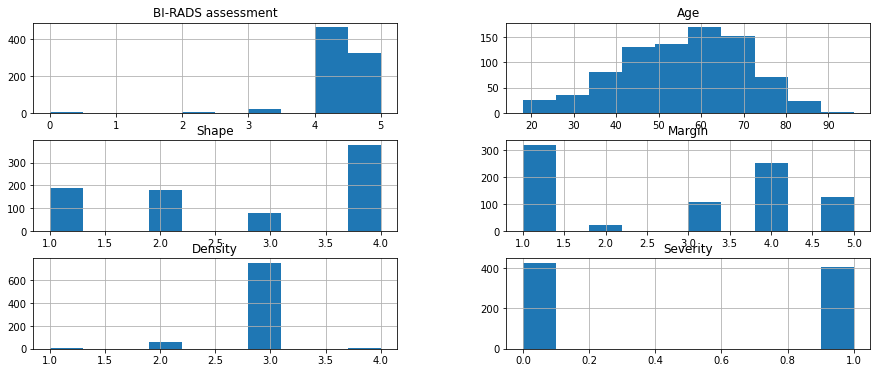

In [12]:
df.hist()
plt.gcf().set_size_inches(15, 6)

## 2. Classification Decision Tree - sklearn

#### Splitting data in train and test and setting target.

In [13]:
x = df.drop('Severity', axis = 1)
y = df['Severity']

x_train, x_test, y_train, y_test = tts(x,y, random_state=1, test_size=0.1)

#### Model selection and training.

In [14]:
from sklearn.tree import DecisionTreeClassifier

classification_tree = DecisionTreeClassifier(random_state = 1
                                             , max_depth = 500
                                             , min_samples_split = 5
                                             , min_samples_leaf = 5
                                             , max_features = 5
                                             )

classification_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=500, max_features=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=1)

In [15]:
classification_tree.predict_proba(x_test)[0:10]
# classification_tree.get_params()
# classification_tree.score(x_test,y_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.83333333, 0.16666667],
       [0.88888889, 0.11111111],
       [0.2       , 0.8       ],
       [0.85714286, 0.14285714],
       [0.11111111, 0.88888889]])

In [16]:
train_preds = classification_tree.predict(x_train)
test_preds = classification_tree.predict(x_test)

In [17]:
test_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

## 3. Model evaluation

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

confusion_matrix_train = pd.DataFrame(confusion_matrix(y_train, train_preds)/len(y_train) * 100)
confusion_matrix_test = pd.DataFrame(confusion_matrix(y_test, test_preds) / len(y_test) * 100)
print(round(confusion_matrix_train,2), '\n')
print(round(confusion_matrix_test,2), '\n')


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_preds)
roc_auc_train = auc(fpr_train, tpr_train)
                                                 
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_preds)
roc_auc_test = auc(fpr_test, tpr_test)  

print('Both these metrics (AUC and Gini) are a scored from 0 to 1, 1 being the perfect score')
print('-------------------------------------------------------------------------------------')
print('AUC - train: ', round(roc_auc_train,4))                                              
print('AUC - test: ', round(roc_auc_test,4), '\n')    

print('Gini - train: ',  round(2*roc_auc_train-1,4))
print('Gini - test: ',  round(2*roc_auc_test-1,4))

       0      1
0  44.44   6.16
1   6.96  42.44 

       0      1
0  53.01   6.02
1   9.64  31.33 

Both these metrics (AUC and Gini) are a scored from 0 to 1, 1 being the perfect score
-------------------------------------------------------------------------------------
AUC - train:  0.8687
AUC - test:  0.8313 

Gini - train:  0.7374
Gini - test:  0.6627


In [19]:
import sklearn.metrics as metrics

print("Accuracy:", round(metrics.accuracy_score(test_preds, y_test),3))


Accuracy: 0.843


In [20]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# from six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()

# export_graphviz(classification_tree
#                 , out_file = dot_data
#                 , filled = True
#                 , rounded = True
#                 , special_characters = True
#                 , feature_names = df.columns[0:5]
#                 , class_names=['0','1'])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Image(graph.create_png())

In [21]:
size = [0.10, 0.20, 0.30, 0.40, 0.50]

for i in size:
    x = df.drop('Severity', axis = 1)
    y = df['Severity']

    x_train, x_test, y_train, y_test = tts(x,y, random_state=1, test_size=i)

    from sklearn.tree import DecisionTreeClassifier

    classification_tree = DecisionTreeClassifier(random_state = 1)

    classification_tree.fit(x_train, y_train)

    print("test_size == {}: ".format(i), classification_tree.score(x_test,y_test))

test_size == 0.1:  0.8192771084337349
test_size == 0.2:  0.7831325301204819
test_size == 0.3:  0.7590361445783133
test_size == 0.4:  0.7530120481927711
test_size == 0.5:  0.7349397590361446


## Conclusion.
- This model is overfitted, due to small sample size, dataset (before dealing with missing values) had only 961 entries.  
    the more data I gave the model to learn (lower test_size), the better it perfomed.  
    [7 Effective Ways to Deal With a Small Dataset](https://hackernoon.com/7-effective-ways-to-deal-with-a-small-dataset-2gyl407s)
- Tunning the params improved the model, but tunning hyperparameters is a little advanced for me. (for now).  
[How to tune a Decision Tree?](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
- Below I ran a LogisticRegression to check how it would deal with this dataset, results were a little worse.  

In [22]:
from sklearn.metrics import confusion_matrix
size = [0.10, 0.20, 0.30, 0.40, 0.50]

for i in size:
    x = df.drop('Severity', axis = 1)
    y = df['Severity']

    x_train, x_test, y_train, y_test = tts(x,y, random_state=1, test_size=i)

    from sklearn.linear_model import LogisticRegression

    model2 = LogisticRegression()

    model2.fit(x_train, y_train)

    print("test_size == {}: ".format(i), classification_tree.score(x_test,y_test))

test_size == 0.1:  0.7469879518072289
test_size == 0.2:  0.7530120481927711
test_size == 0.3:  0.751004016064257
test_size == 0.4:  0.7379518072289156
test_size == 0.5:  0.7349397590361446
